# Power Analysis

Using a simr to simulate our mixed effects model with the between-subjects factor condition assignment and within-subjects factor evidence level, what sample size do we need to achive $\beta=0.2$ given a [small-medium effect size](http://methods.sagepub.com/Reference//the-sage-encyclopedia-of-communication-research-methods/i4505.xml)?

> power is simply the proportion of times that we are able to reject the null hypothesis (remembering that we control the population means and we know that there is a true difference)


In [ ]:
library(lme4)
library(AER)
library(dplyr)
library(purrr)
library(magrittr)
library(ggplot2)

data <- read.csv("../../data/processed/mock_data/reshare_rates.csv")
head(data)

In [15]:
library(simr)

md1 <- lmer(Affirms ~ treatment * evidence + (1 | PROLIFIC_ID), data = data)
summary(md1)

Linear mixed model fit by REML ['lmerMod']
Formula: Affirms ~ treatment * evidence + (1 | PROLIFIC_ID)
   Data: data

REML criterion at convergence: 319.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2535 -0.6316 -0.0172  0.6759  2.2962 

Random effects:
 Groups      Name        Variance Std.Dev.
 PROLIFIC_ID (Intercept) 0.004761 0.0690  
 Residual                0.080942 0.2845  
Number of obs: 790, groups:  PROLIFIC_ID, 395

Fixed effects:
                               Estimate Std. Error t value
(Intercept)                     0.53570    0.02107  25.421
treatmentTreatment              0.11788    0.02947   4.000
evidenceLow                    -0.09066    0.02896  -3.130
treatmentTreatment:evidenceLow -0.23006    0.04050  -5.681

Correlation of Fixed Effects:
            (Intr) trtmnT evdncL
trtmntTrtmn -0.715              
evidenceLow -0.687  0.491       
trtmntTrt:L  0.491 -0.687 -0.715

In [10]:
fixef(md1)

(Intercept)             treatmentTreatment 
                    0.53569578                     0.11788154 
                   evidenceLow treatmentTreatment:evidenceLow 
                   -0.09066329                    -0.23006396

In [13]:
power <- powerSim(md1, test=fixed("treatmentTreatment:evidenceLow", "z"), nsim = 200)
print(power)

Power for predictor 'treatmentTreatment:evidenceLow', (95% confidence interval):
      100.0% (98.17, 100.0)

Test: z-test
      Effect size for treatmentTreatment:evidenceLow is -0.23

Based on 200 simulations, (0 warnings, 0 errors)
alpha = 0.05, nrow = 790

Time elapsed: 0 h 0 m 20 s

nb: result might be an observed power calculation


In [ ]:
pc2 <- powerCurve(md1, test=fixed("treatmentTreatment:evidenceLow", "z"),nsim=50, along = "PROLIFIC_ID",seed=1)

Power for predictor 'treatmentTreatment:evidenceLow', (95% confidence interval),
by largest value of PROLIFIC_ID:
      3:  0.00% ( 0.00,  0.37) - 6 rows
     65: 51.70% (48.55, 54.84) - 94 rows
    129: 77.40% (74.68, 79.96) - 180 rows
    188: 91.50% (89.60, 93.15) - 268 rows
    236: 96.40% (95.05, 97.47) - 354 rows
    289: 98.50% (97.54, 99.16) - 442 rows
    345: 99.60% (98.98, 99.89) - 528 rows
    395: 99.70% (99.13, 99.94) - 616 rows
    448: 100.0% (99.63, 100.0) - 702 rows
    499: 100.0% (99.63, 100.0) - 790 rows

Time elapsed: 0 h 9 m 3 s


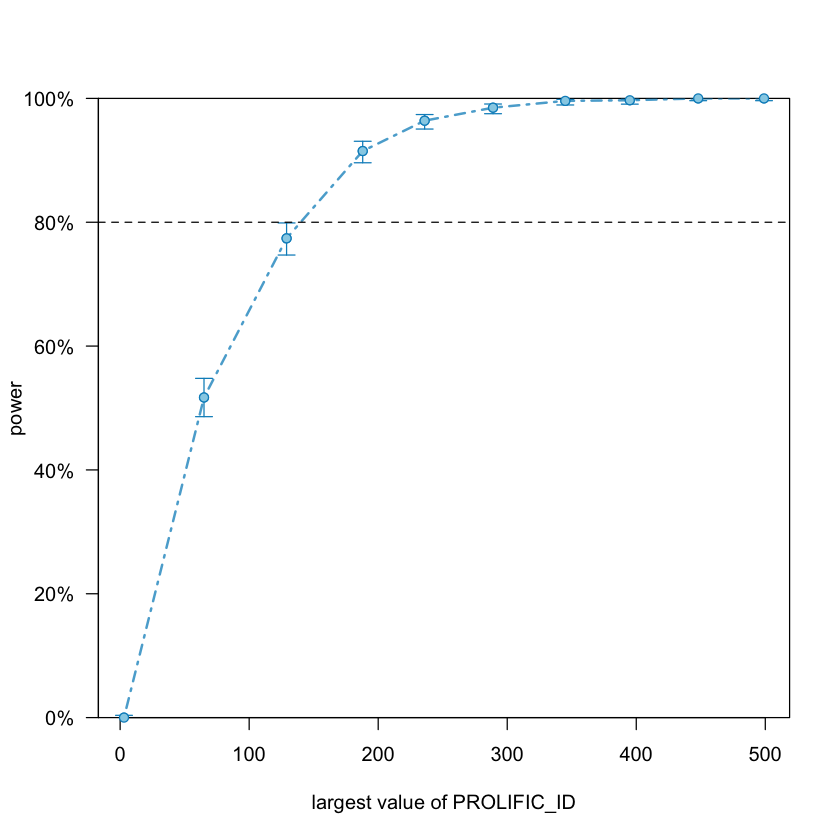

In [11]:
print(pc2)
plot(pc2)